# <p style="padding:10px;background-color:#8A2BE2;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">TRAFFIC SIGNAL IMAGE CLASSIFICATION </p>

# Table of Contents

1. [Problem Statement](#problem_statement)
2. [Brief Description](#Goal)
3. [Data Information](#Information)
4. [Import Libraries](#import_libraries)
5. [Reading Image](#Reading)
   1. [Plot The Images](#Plot)
   2. [Rescaling Images](#Rescaling)
6. [PreTrained Models](#Inceptions) 
   1. [PreTrained Models summary](#summary123)
7. [Model architecture](#Basic)
   1. [Plot Accuracy and loss](#PLOT22)
8. [Regularizers Model Architecture](#Architecture)
   1. [Model Summary](#Summary090)
   2. [Plot Accuracy and loss](#PLOT2233)
   3. [Evaluation Metrics](#Evaluation)
   4. [Classification report](#report)
8. [Predication on Test Image](#Test)
9. [Conclusion](#conclusion)   

# **<mark style="background-color:#9370DB;color:white;border-radius:5px;opacity:1.0">1. Problem Statement <a id="problem_statement"></a></mark>** 

-  The development of reliable autonomous driving and advanced driver assistance systems (ADAS) is currently challenged by the need for highly accurate traffic sign recognition. Variability in sign designs, environmental conditions, and physical obstructions presents a significant hurdle. This project aims to address this challenge by creating an advanced Traffic Sign Classification model using neural network architectures like InceptionV3 and CNN. The goal is to accurately classify traffic signs from varied visual inputs, thereby enhancing the safety and efficiency of autonomous navigation systems.

# **<mark style="background-color:#9370DB;color:white;border-radius:5px;opacity:1.0">2. Brief Description<a id="Goal"></a></mark>** 

##### Objective: 
- Aimed at high-accuracy classification of traffic signs using their unique visual features.

##### Significance: 
- Addressed a vital need in autonomous driving systems and advanced driver-assistance systems (ADAS) for ensuring road safety.

##### Data Utilization: 
- Employed a comprehensive dataset of traffic sign images for model training and evaluation.

##### Model Optimization: 
- Focused on fine-tuning model parameters and hyperparameters to optimize performance.

##### Architectural Exploration: 
- Tested various neural network architectures to determine their effectiveness in traffic sign classification.

##### Outcomes: 
- Demonstrated the robustness of different neural network models in accurately recognizing and classifying traffic signs.

##### Contribution to ITS: 
- Provided valuable insights for the advancement of intelligent transportation systems (ITS).

##### Road Safety Impact: 
- Highlighted the potential of automated traffic sign recognition in enhancing road safety.

# **<mark style="background-color:#9370DB;color:white;border-radius:5px;opacity:1.0">3. Data Information<a id="Information"></a></mark>** 

| Label | Traffic Sign Description                                  |
|-------|-----------------------------------------------------------|
| '0'   | Speed limit (20km/h)                                     |
| '1'   | Speed limit (30km/h)                                     |
| '2'   | Speed limit (50km/h)                                     |
| '3'   | Speed limit (60km/h)                                     |
| '4'   | Speed limit (70km/h)                                     |
| '5'   | Speed limit (80km/h)                                     |
| '6'   | End of speed limit (80km/h)                              |
| '7'   | Speed limit (100km/h)                                    |
| '8'   | Speed limit (120km/h)                                    |
| '9'   | No passing                                               |
| '10'  | No passing for vehicles over 3.5 metric tons             |
| '11'  | Right-of-way at the next intersection                    |
| '12'  | Priority road                                            |
| '13'  | Yield                                                   |
| '14'  | Stop                                                    |
| '15'  | No vehicles                                             |
| '16'  | Vehicles over 3.5 metric tons prohibited                |
| '17'  | No entry                                                |
| '18'  | General caution                                         |
| '19'  | Dangerous curve to the left                              |
| '20'  | Dangerous curve to the right                             |
| '21'  | Double curve                                            |
| '22'  | Bumpy road                                               |
| '23'  | Slippery road                                            |
| '24'  | Road narrows on the right                                |
| '25'  | Road work                                                |
| '26'  | Traffic signals                                          |
| '27'  | Pedestrians                                              |
| '28'  | Children crossing                                        |
| '29'  | Bicycles crossing                                        |
| '30'  | Beware of ice/snow                                       |
| '31'  | Wild animals crossing                                    |
| '32'  | End of all speed and passing limits                      |
| '33'  | Turn right ahead                                         |
| '34'  | Turn left ahead                                          |
| '35'  | Ahead only                                               |
| '36'  | Go straight or right                                     |
| '37'  | Go straight or left                                      |
| '38'  | Keep right                                               |
| '39'  | Keep left                                                |
| '40'  | Roundabout mandatory                                     |
| '41'  | End of no passing                                         |
| '42'  | End of no passing by vehicles over 3.5 metric            |


# **<mark style="background-color:#9370DB; color:white;border-radius:5px;opacity:1.0">4. Import Libraries<a id="import_libraries"></a></mark>** 

In [60]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot  as plt
from matplotlib.image import imread
%matplotlib inline
import pickle
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from pandas.io.parsers import read_csv

import os
import re
import cv2
import tensorflow as tf
from tensorflow import keras
from PIL import Image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator , load_img ,img_to_array
from tensorflow.keras.utils import load_img,img_to_array
from tensorflow.keras.applications.densenet import DenseNet121, preprocess_input
from keras import regularizers
import keras_tuner as kt
from keras.utils import to_categorical
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix

import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=DeprecationWarning)

#### **<mark style="background-color:#AF9EFF ;color:white;border-radius:5px;opacity:1.0">To convert a pickle file to an image<a id="Plot"></a></mark>**

In [2]:
#training_file   = r"C:\Users\kumar\Data science\0.PROJECT'S IDEAS\2.DL\Traffic signal Image Classification\Traffic signal data\train.p"
#validation_file = r"C:\Users\kumar\Data science\0.PROJECT'S IDEAS\2.DL\Traffic signal Image Classification\Traffic signal data\valid.p"
#testing_file    = r"C:\Users\kumar\Data science\0.PROJECT'S IDEAS\2.DL\Traffic signal Image Classification\Traffic signal data\test.p"

In [3]:
#with open(training_file, mode='rb') as f:
#    train = pickle.load(f)
    
# Assuming 'features' and 'labels' are lists of image arrays and corresponding labels
#for i, (image_array, label) in enumerate(zip(train['features'], train['labels'])):
#    # Create a folder for each label if it doesn't exist
#    folder_path = f"train_images/label_{label}"
#    os.makedirs(folder_path, exist_ok=True)

    # Save the image in the corresponding folder
#    image = Image.fromarray(image_array)
#    image.save(os.path.join(folder_path, f"train_image_{i}.png"))

In [4]:
#with open(validation_file, mode='rb') as f:
#    valid = pickle.load(f)

# Assuming 'features' and 'labels' are lists of image arrays and corresponding labels
#for i, (image_array, label) in enumerate(zip(valid['features'], valid['labels'])):
    # Create a folder for each label if it doesn't exist
#    folder_path = f"valid_images/label_{label}"
#    os.makedirs(folder_path, exist_ok=True)

    # Save the image in the corresponding folder
#    image = Image.fromarray(image_array)
#    image.save(os.path.join(folder_path, f"valid_image_{i}.png"))

In [5]:
#with open(testing_file, mode='rb') as f:
#    test = pickle.load(f)

# Assuming 'features' and 'labels' are lists of image arrays and corresponding labels
#for i, (image_array, label) in enumerate(zip(test['features'], test['labels'])):
    # Create a folder for each label if it doesn't exist
#    folder_path = f"test_images/label_{label}"
#    os.makedirs(folder_path, exist_ok=True)

    # Save the image in the corresponding folder
#    image = Image.fromarray(image_array)
#    image.save(os.path.join(folder_path, f"test_image_{i}.png"))

# **<mark style="background-color:#9370DB;color:white;border-radius:5px;opacity:1.0">5. Reading Image<a id="Reading"></a></mark>** 

In [2]:
my_data_dir = r"C:\Users\kumar\Data science\0.PROJECT'S IDEAS\2.DL\Traffic signal Image Classification\Traffic signal data"
train_path = my_data_dir + '/Train/'
test_path = my_data_dir + '/Test/'
valid_path = my_data_dir + '/validation/'

image_shape = (32,32,3)
batch_size = 32

In [61]:
sign_names = pd.read_csv(r"C:\Users\kumar\Data science\0.PROJECT'S IDEAS\2.DL\Traffic signal Image Classification\Traffic signal data\signname.csv").values[:, 1]

## **<mark style="background-color:#9370DB;color:white;border-radius:5px;opacity:1.0"> Plot The Images <a id="Plot"></a></mark>**

#### **<mark style="background-color:#AF9EFF ;color:white;border-radius:5px;opacity:1.0">Visualizations of image datasets for each class <a id="Plot"></a></mark>**

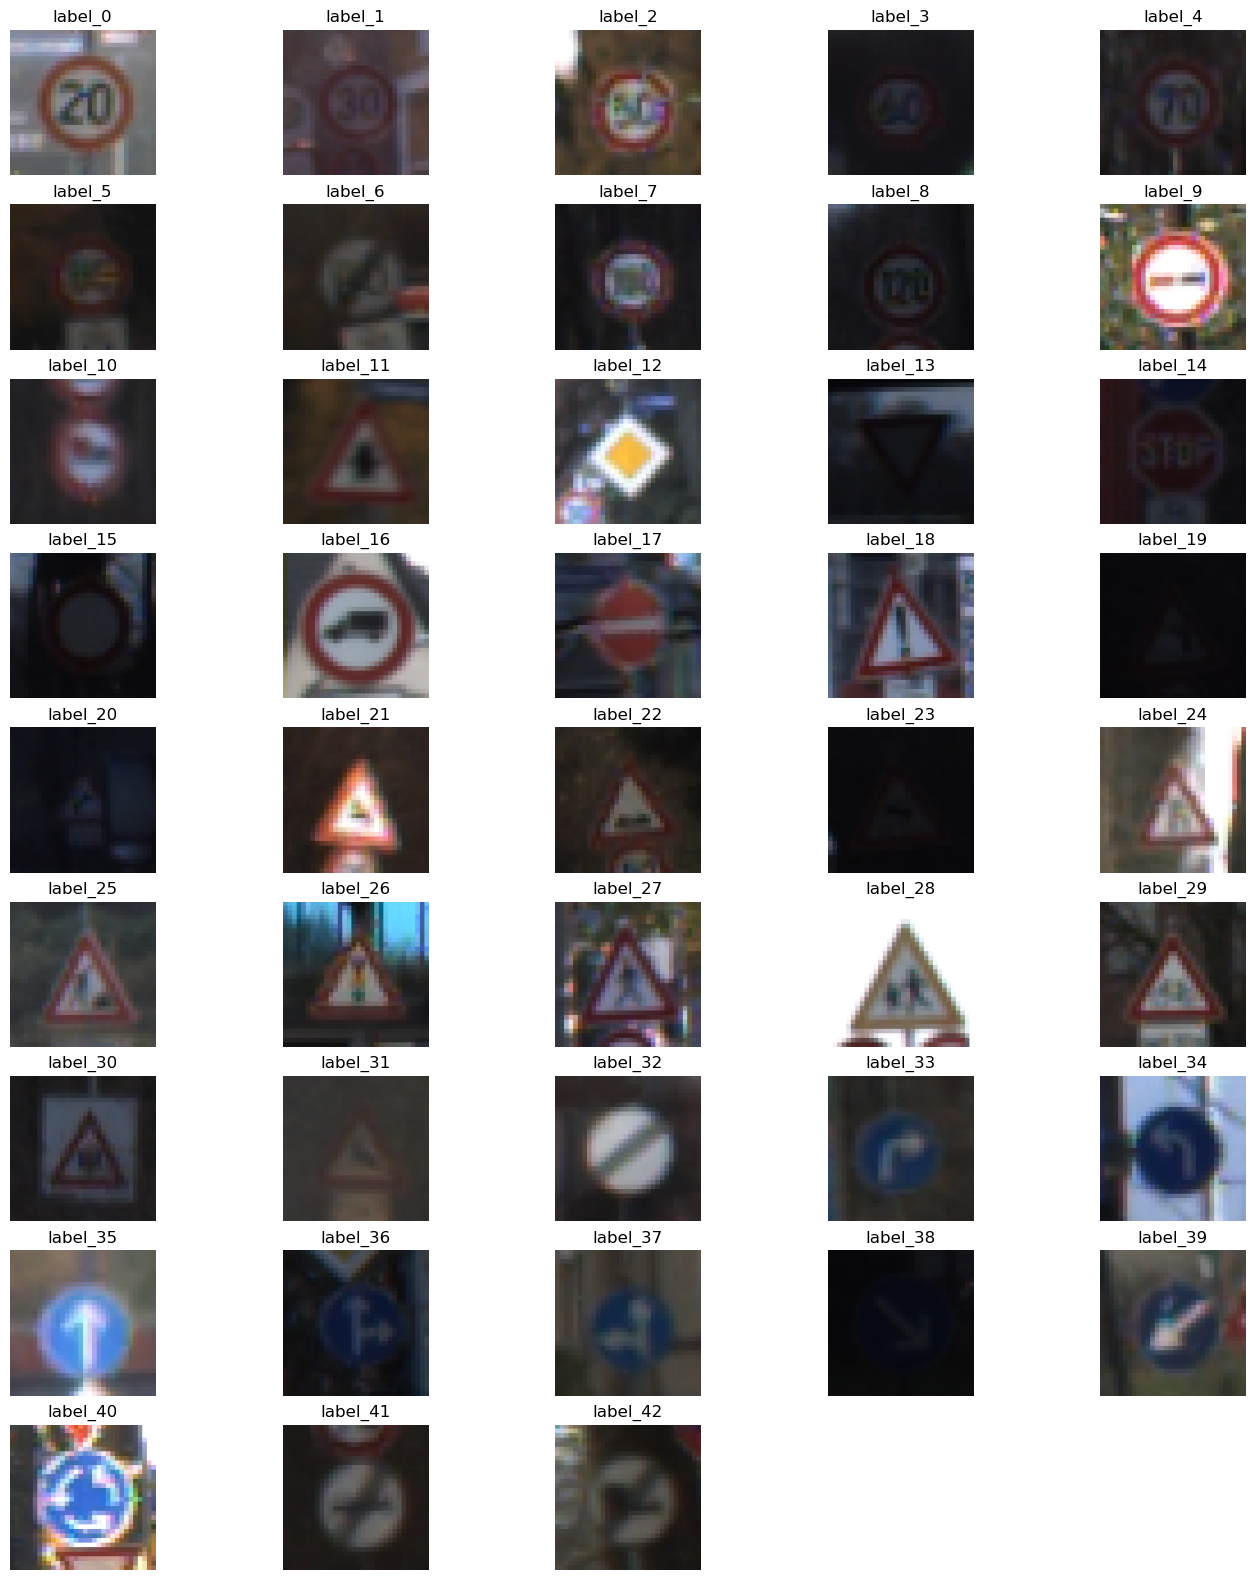

In [8]:
train_paths = os.path.join(my_data_dir, 'Train')
class_names = sorted(os.listdir(train_paths), key=lambda x: int(re.search(r'\d+', x).group()))  # Sort class names based on numeric part

# Display 43 images from the dataset
plt.figure(figsize=(17, 20))
for i in range(43):
    class_path = os.path.join(train_paths, class_names[i])
    image_path = os.path.join(class_path, os.listdir(class_path)[0])  # Assuming you want to display the first image in each class
    image = load_img(image_path, target_size=(128, 128))
    ax = plt.subplot(9, 5, i + 1)  # Adjust the subplot layout according to your preference
    plt.imshow(image)
    plt.title(class_names[i])
    plt.axis("off")

plt.show()

In [24]:
def plot_history(history):
    hist = history.history

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(np.arange(1, len(hist['accuracy']) + 1), hist['accuracy'], label='Train Accuracy')
    plt.plot(np.arange(1, len(hist['val_accuracy']) + 1), hist['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0, 1])
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(np.arange(1, len(hist['loss']) + 1), hist['loss'], label='Train Loss')
    plt.plot(np.arange(1, len(hist['val_loss']) + 1), hist['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

## **<mark style="background-color:#9370DB;color:white;border-radius:5px;opacity:1.0"> Rescaling Images<a id="Rescaling"></a></mark>** 

In [3]:
image_gen = ImageDataGenerator(rescale=1./255)

## **<mark style="background-color:#9370DB;color:white;border-radius:5px;opacity:1.0">6.Transfer Learning - Directly using PreTrained Models - InceptionsV3<a id="Inceptions"></a></mark>**

In [14]:
train_set = image_gen.flow_from_directory(train_path,
                                               target_size=(299, 299),
                                               batch_size=batch_size,
                                               color_mode = 'rgb',
                                               class_mode='sparse',shuffle=True)

test_set = image_gen.flow_from_directory(test_path,
                                               target_size=(299,299),
                                               batch_size=batch_size,
                                               color_mode = 'rgb',
                                               class_mode='sparse',shuffle=False)

val_set = image_gen.flow_from_directory(valid_path,
                                               target_size=(299,299),
                                               batch_size=batch_size,
                                               color_mode = 'rgb',
                                               class_mode='sparse',shuffle=False)

Found 34799 images belonging to 43 classes.
Found 12630 images belonging to 43 classes.
Found 4410 images belonging to 43 classes.


In [15]:
print("Train shapes:",train_set[0][0].shape)
print("Test shapes:",test_set[0][0].shape)
print("Test shapes:",val_set[0][0].shape)

Train shapes: (32, 299, 299, 3)
Test shapes: (32, 299, 299, 3)
Test shapes: (32, 299, 299, 3)


In [16]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [17]:
base_model = InceptionV3(weights = 'imagenet',include_top = False ,input_shape=(299,299,3))
base_model.trainable = False

In [18]:
x = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
output = tf.keras.layers.Dense(43,activation='softmax')(x)
model = tf.keras.Model(inputs = base_model.input ,outputs=output)

In [19]:
optimizer = tf.keras.optimizers.Adam()

model.compile(optimizer = optimizer , loss='sparse_categorical_crossentropy', metrics=['accuracy'])

## **<mark style="background-color:#9370DB;color:white;border-radius:5px;opacity:1.0">PreTrained Models summary<a id="summary123"></a></mark>** 

In [21]:
history = model.fit(train_set,epochs=3,validation_data=val_set)

Epoch 1/3
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 1447s 1s/step - accuracy: 0.7627 - loss: 0.8352 - val_accuracy: 0.6807 - val_loss: 1.0535
Epoch 2/3
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 1461s 1s/step - accuracy: 0.8841 - loss: 0.4148 - val_accuracy: 0.6948 - val_loss: 1.0053
Epoch 3/3
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 1932s 2s/step - accuracy: 0.9225 - loss: 0.2912 - val_accuracy: 0.7011 - val_loss: 1.0542


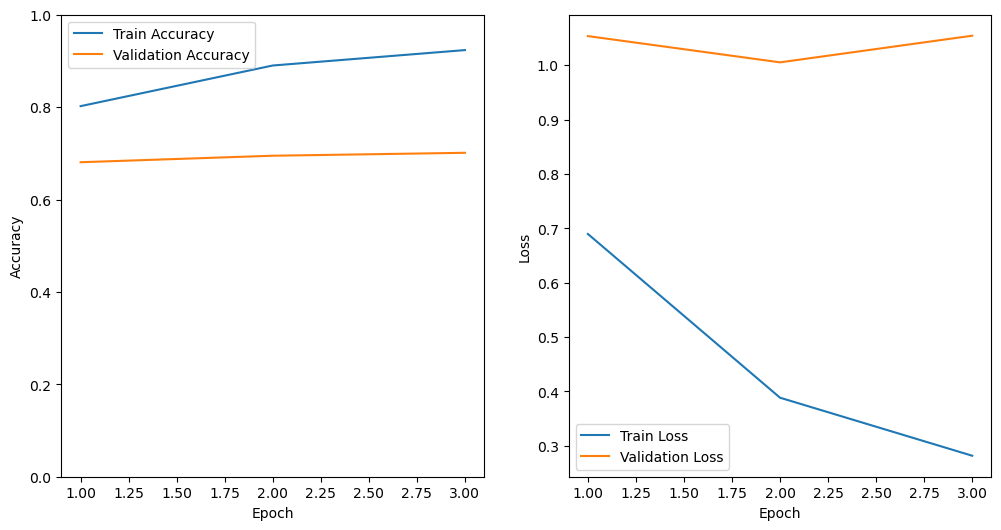

In [25]:
plot_history(history)

##### <div class="alert alert-block alert-info"> The use of a pre-trained model leads to overfitting.</div>

In [26]:
train_set = image_gen.flow_from_directory(train_path,
                                               target_size=(32, 32),
                                               batch_size=batch_size,
                                               color_mode = 'rgb',
                                               class_mode='sparse',shuffle=True)

test_set = image_gen.flow_from_directory(test_path,
                                               target_size=(32,32),
                                               batch_size=batch_size,
                                               color_mode = 'rgb',
                                               class_mode='sparse',shuffle=False)

val_set = image_gen.flow_from_directory(valid_path,
                                               target_size=(32,32),
                                               batch_size=batch_size,
                                               color_mode = 'rgb',
                                               class_mode='sparse',shuffle=False)

Found 34799 images belonging to 43 classes.
Found 12630 images belonging to 43 classes.
Found 4410 images belonging to 43 classes.


##### Check the shape of images

In [27]:
print("Train shapes:",train_set[0][0].shape)
print("Test shapes:",test_set[0][0].shape)
print("Test shapes:",val_set[0][0].shape)

Train shapes: (32, 32, 32, 3)
Test shapes: (32, 32, 32, 3)
Test shapes: (32, 32, 32, 3)


# **<mark style="background-color:#9370DB;color:white;border-radius:5px;opacity:1.0">7.Model Architecture<a id="Basic"></a></mark>**

In [28]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(43, activation='softmax'))

In [29]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer = optimizer , loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [30]:
Early_Stopping = EarlyStopping(monitor='val_loss', mode='min', patience=30)

history= model.fit(train_set,epochs=10,batch_size=500,validation_data=val_set,callbacks=[Early_Stopping])

Epoch 1/10
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 41s 34ms/step - accuracy: 0.1908 - loss: 2.9315 - val_accuracy: 0.8150 - val_loss: 0.6525
Epoch 2/10
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 33s 30ms/step - accuracy: 0.8274 - loss: 0.5395 - val_accuracy: 0.9311 - val_loss: 0.3246
Epoch 3/10
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 35s 32ms/step - accuracy: 0.9212 - loss: 0.2447 - val_accuracy: 0.9658 - val_loss: 0.2226
Epoch 4/10
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 35s 32ms/step - accuracy: 0.9530 - loss: 0.1462 - val_accuracy: 0.9696 - val_loss: 0.2629
Epoch 5/10
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 36s 33ms/step - accuracy: 0.9654 - loss: 0.1170 - val_accuracy: 0.9753 - val_loss: 0.2041
Epoch 6/10
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 34s 32ms/step - accuracy: 0.9709 - loss: 0.0990 - val_accuracy: 0.9696 - val_loss: 0.2195
Epoch 7/10
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 34s 31ms/step - accuracy: 0.9727 - loss: 0.0919 - val_accuracy: 0.9760 - val_loss: 0.1483
Epoch 8/10
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 35s 32ms/step - accuracy: 0.9780 -

## **<mark style="background-color:#9370DB;color:white;border-radius:5px;opacity:1.0">Model Summary<a id="Summary1"></a></mark>**

In [32]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Layer (type)                       ┃ Output Shape                  ┃     Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ conv2d_188 (Conv2D)                │ (None, 32, 32, 32)            │         896 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ conv2d_189 (Conv2D)                │ (None, 30, 30, 32)            │       9,248 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ max_pooling2d_8 (MaxPooling2D)     │ (None, 15, 15, 32)            │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dropout (Dropout)                  │ (None, 15, 15, 32)            │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ conv2d_190 (Conv2D)                │ (None, 15, 15, 64)            │      18,496 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ conv2d_191 (Conv2D)                │ (None, 13, 13, 64)            │      36,928 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ max_pooling2d_9 (MaxPooling2D)     │ (None, 6, 6, 64)              │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dropout_1 (Dropout)                │ (None, 6, 6, 64)              │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ conv2d_192 (Conv2D)                │ (None, 6, 6, 64)              │      36,928 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ conv2d_193 (Conv2D)                │ (None, 4, 4, 64)              │      36,928 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ max_pooling2d_10 (MaxPooling2D)    │ (None, 2, 2, 64)              │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dropout_2 (Dropout)                │ (None, 2, 2, 64)              │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ flatten (Flatten)                  │ (None, 256)                   │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dense_2 (Dense)                    │ (None, 512)                   │     131,584 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dropout_3 (Dropout)                │ (None, 512)                   │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dense_3 (Dense)                    │ (None, 43)                    │      22,059 │
└────────────────────────────────────┴───────────────────────────────┴─────────────┘

 Total params: 879,203 (3.35 MB)

 Trainable params: 293,067 (1.12 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 586,136 (2.24 MB)

## **<mark style="background-color:#9370DB;color:white;border-radius:5px;opacity:1.0">Plot Accuracy and loss<a id="PLOT22"></a></mark>**

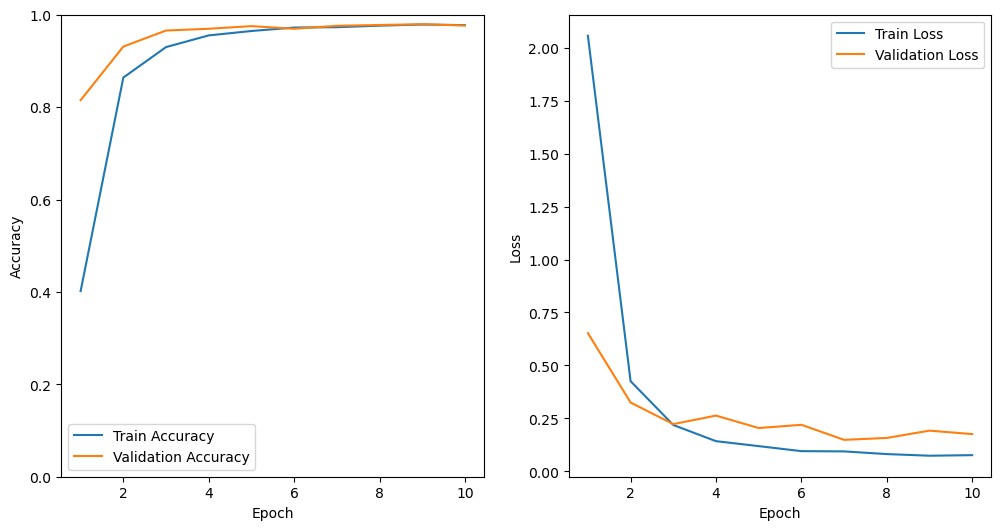

In [33]:
plot_history(history)

##### <div class="alert alert-block alert-info">The model is exhibiting a slight tendency toward overfitting</div>

# **<mark style="background-color:#9370DB;color:white;border-radius:5px;opacity:1.0">8.Regularizers Model Architecture<a id="Architecture"></a></mark>**

In [45]:
from keras.regularizers import l2

model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))

model.add(Dense(43, activation='softmax'))

In [86]:
optimizer = tf.keras.optimizers.Adam()

model.compile(optimizer = optimizer , loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [47]:
Early_Stopping = EarlyStopping(monitor='val_loss', mode='min', patience=30)

history= model.fit(train_set,epochs=20,batch_size=500,validation_data=val_set,callbacks=[Early_Stopping])

Epoch 1/10
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 38s 31ms/step - accuracy: 0.2453 - loss: 3.2199 - val_accuracy: 0.8150 - val_loss: 0.8145
Epoch 2/10
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 31s 29ms/step - accuracy: 0.8242 - loss: 0.7668 - val_accuracy: 0.9245 - val_loss: 0.5103
Epoch 3/10
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 33s 30ms/step - accuracy: 0.9051 - loss: 0.5026 - val_accuracy: 0.9537 - val_loss: 0.3736
Epoch 4/10
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 34s 31ms/step - accuracy: 0.9379 - loss: 0.3734 - val_accuracy: 0.9592 - val_loss: 0.3448
Epoch 5/10
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 33s 30ms/step - accuracy: 0.9456 - loss: 0.3484 - val_accuracy: 0.9605 - val_loss: 0.2948
Epoch 6/10
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 33s 30ms/step - accuracy: 0.9553 - loss: 0.3137 - val_accuracy: 0.9698 - val_loss: 0.2544
Epoch 7/10
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 33s 30ms/step - accuracy: 0.9627 - loss: 0.2836 - val_accuracy: 0.9701 - val_loss: 0.2873
Epoch 8/10
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 34s 31ms/step - accuracy: 0.9696 -

## **<mark style="background-color:#9370DB;color:white;border-radius:5px;opacity:1.0">Model Summary<a id="Summary090"></a></mark>**

In [54]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Layer (type)                       ┃ Output Shape                  ┃     Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ conv2d_212 (Conv2D)                │ (None, 32, 32, 32)            │         896 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ conv2d_213 (Conv2D)                │ (None, 30, 30, 32)            │       9,248 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ max_pooling2d_20 (MaxPooling2D)    │ (None, 15, 15, 32)            │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dropout_18 (Dropout)               │ (None, 15, 15, 32)            │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ conv2d_214 (Conv2D)                │ (None, 15, 15, 64)            │      18,496 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ conv2d_215 (Conv2D)                │ (None, 13, 13, 64)            │      36,928 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ max_pooling2d_21 (MaxPooling2D)    │ (None, 6, 6, 64)              │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dropout_19 (Dropout)               │ (None, 6, 6, 64)              │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ conv2d_216 (Conv2D)                │ (None, 6, 6, 64)              │      36,928 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ conv2d_217 (Conv2D)                │ (None, 4, 4, 64)              │      36,928 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ max_pooling2d_22 (MaxPooling2D)    │ (None, 2, 2, 64)              │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dropout_20 (Dropout)               │ (None, 2, 2, 64)              │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ flatten_4 (Flatten)                │ (None, 256)                   │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dense_12 (Dense)                   │ (None, 512)                   │     131,584 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dropout_21 (Dropout)               │ (None, 512)                   │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dense_13 (Dense)                   │ (None, 43)                    │      22,059 │
└────────────────────────────────────┴───────────────────────────────┴─────────────┘

 Total params: 879,203 (3.35 MB)

 Trainable params: 293,067 (1.12 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 586,136 (2.24 MB)

## **<mark style="background-color:#9370DB;color:white;border-radius:5px;opacity:1.0">Plot Accuracy and loss<a id="PLOT2233"></a></mark>**

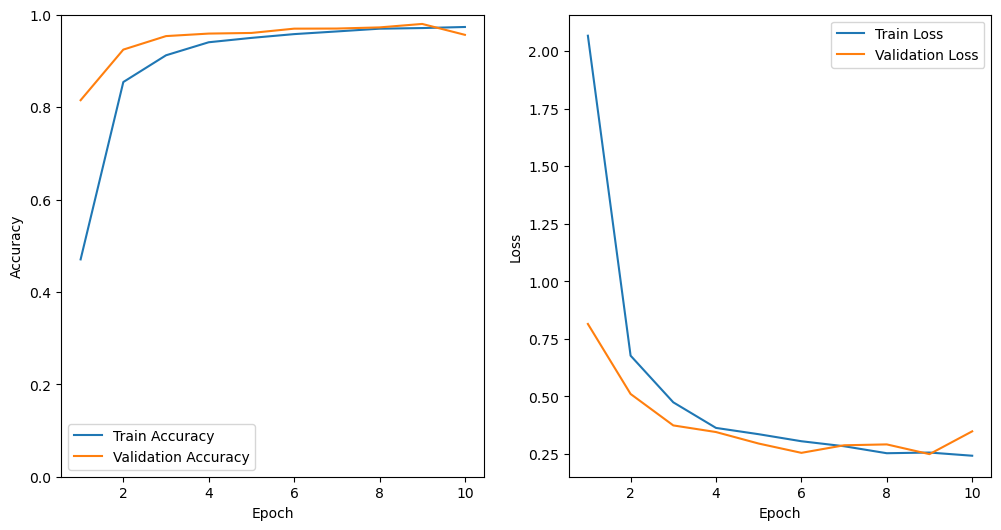

In [48]:
plot_history(history)

## **<mark style="background-color:#9370DB;color:white;border-radius:5px;opacity:1.0">Evaluation Metrics<a id="Evaluation"></a></mark>** 

In [89]:
loss,acc = model.evaluate(test_set)

395/395 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9801 - loss: 0.2369


In [91]:
pred = model.predict(test_set)
pred = np.argmax(pred, axis=1)

395/395 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step


## **<mark style="background-color:#9370DB;color:white;border-radius:5px;opacity:1.0">classification report<a id="report"></a></mark>** 

In [103]:
y_true = test_set.labels.astype(int)
y_pred = [int(k) for k in pred]

print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        60
           1       0.98      1.00      0.99       720
           2       1.00      0.99      1.00       660
           3       0.94      0.99      0.97       420
           4       1.00      0.97      0.99       690
           5       0.99      0.99      0.99       720
           6       0.97      1.00      0.99       270
           7       0.96      1.00      0.98       210
           8       1.00      0.99      0.99       150
           9       0.97      0.92      0.94       360
          10       0.97      0.96      0.97       390
          11       1.00      1.00      1.00        60
          12       0.97      1.00      0.98       750
          13       0.91      1.00      0.95        90
          14       0.96      0.77      0.85        90
          15       1.00      0.81      0.89       120
          16       0.90      0.99      0.95       150
          17       0.97    

# **<mark style="background-color:#9370DB;color:white;border-radius:5px;opacity:1.0">7. Predication on Test Image<a id="Test"></a></mark>** 

In [128]:
predicted_lables = np.argmax(predictions,axis=1)
incorrectly_predicted_images = [i for i in range(12630) if y_true[i]!=y_pred[i]]

In [129]:
len(incorrectly_predicted_images)

320

##### <div class="alert alert-block alert-info">Three hundred and twenty images were wrongly predicted</div>

##### **<mark style="background-color:#9370DB;color:white;border-radius:5px;opacity:1.0">Dangerous curve to the right<a id=""></a></mark>**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicted Label: label_20
label_0: 0.00%
label_1: 0.00%
label_10: 0.00%
label_11: 0.00%
label_12: 0.00%
label_13: 0.00%
label_14: 0.00%
label_15: 0.00%
label_16: 0.00%
label_17: 0.00%
label_18: 0.00%
label_19: 0.00%
label_2: 0.00%
label_20: 100.00%
label_21: 0.00%
label_22: 0.00%
label_23: 0.00%
label_24: 0.00%
label_25: 0.00%
label_26: 0.00%
label_27: 0.00%
label_28: 0.00%
label_29: 0.00%
label_3: 0.00%
label_30: 0.00%
label_31: 0.00%
label_32: 0.00%
label_33: 0.00%
label_34: 0.00%
label_35: 0.00%
label_36: 0.00%
label_37: 0.00%
label_38: 0.00%
label_39: 0.00%
label_4: 0.00%
label_40: 0.00%
label_41: 0.00%
label_42: 0.00%
label_5: 0.00%
label_6: 0.00%
label_7: 0.00%
label_8: 0.00%
label_9: 0.00%


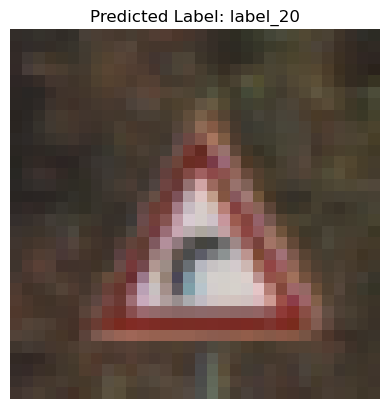

In [134]:
# Path to your external image
external_image_path = "C:/Users/kumar/Data science/0.PROJECT'S IDEAS/2.DL/Traffic signal Image Classification/Traffic signal data/Test/label_20/test_image_5404.png"
external_image = image.load_img(external_image_path, target_size=image_shape[:2])
external_image = image.img_to_array(external_image)
external_image = np.expand_dims(external_image, axis=0)
external_image = external_image / 255.0

# Predicting using the model
predictions = model.predict(external_image)
predicted_class = np.argmax(predictions)

# Retrieving class labels from train_set class_indices
class_labels = list(train_set.class_indices.keys())
predicted_label = class_labels[predicted_class]

# Display prediction percentages for each class
prediction_percentages = predictions[0] * 100
print("Predicted Label:", predicted_label)
for i, percentage in enumerate(prediction_percentages):
    print(f"{class_labels[i]}: {percentage:.2f}%")

# Displaying the image with the predicted label
plt.imshow(external_image[0])
plt.title(f"Predicted Label: {predicted_label}")
plt.axis('off')
plt.show()

##### **<mark style="background-color:#9370DB;color:white;border-radius:5px;opacity:1.0">Keep right<a id=""></a></mark>**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Predicted Label: label_38
label_0: 0.00%
label_1: 0.00%
label_10: 0.00%
label_11: 0.00%
label_12: 0.00%
label_13: 0.00%
label_14: 0.00%
label_15: 0.00%
label_16: 0.00%
label_17: 0.00%
label_18: 0.00%
label_19: 0.00%
label_2: 0.00%
label_20: 0.00%
label_21: 0.00%
label_22: 0.00%
label_23: 0.00%
label_24: 0.00%
label_25: 0.00%
label_26: 0.00%
label_27: 0.00%
label_28: 0.00%
label_29: 0.00%
label_3: 0.00%
label_30: 0.00%
label_31: 0.00%
label_32: 0.00%
label_33: 0.00%
label_34: 0.00%
label_35: 0.00%
label_36: 0.00%
label_37: 0.00%
label_38: 100.00%
label_39: 0.00%
label_4: 0.00%
label_40: 0.00%
label_41: 0.00%
label_42: 0.00%
label_5: 0.00%
label_6: 0.00%
label_7: 0.00%
label_8: 0.00%
label_9: 0.00%


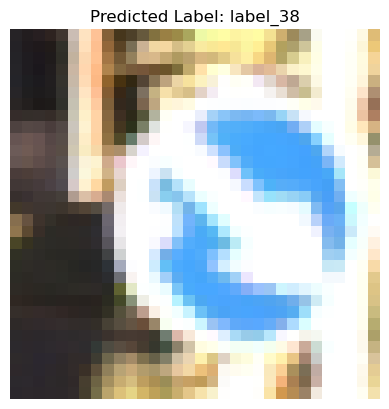

In [143]:
# Path to your external image
external_image_path = r"C:\Users\kumar\Data science\0.PROJECT'S IDEAS\2.DL\Traffic signal Image Classification\Traffic signal data\Test\label_38\test_image_455.png"
external_image = image.load_img(external_image_path, target_size=image_shape[:2])
external_image = image.img_to_array(external_image)
external_image = np.expand_dims(external_image, axis=0)
external_image = external_image / 255.0

# Predicting using the model
predictions = model.predict(external_image)
predicted_class = np.argmax(predictions)

# Retrieving class labels from train_set class_indices
class_labels = list(train_set.class_indices.keys())
predicted_label = class_labels[predicted_class]

# Display prediction percentages for each class
prediction_percentages = predictions[0] * 100
print("Predicted Label:", predicted_label)
for i, percentage in enumerate(prediction_percentages):
    print(f"{class_labels[i]}: {percentage:.2f}%")

# Displaying the image with the predicted label
plt.imshow(external_image[0])
plt.title(f"Predicted Label: {predicted_label}")
plt.axis('off')
plt.show()

##### **<mark style="background-color:#9370DB;color:white;border-radius:5px;opacity:1.0">Roundabout mandatory<a id=""></a></mark>**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicted Label: label_40
label_0: 0.00%
label_1: 0.00%
label_10: 0.00%
label_11: 0.00%
label_12: 0.00%
label_13: 0.00%
label_14: 0.00%
label_15: 0.00%
label_16: 0.00%
label_17: 0.00%
label_18: 0.00%
label_19: 0.00%
label_2: 0.00%
label_20: 0.00%
label_21: 0.00%
label_22: 0.00%
label_23: 0.00%
label_24: 0.00%
label_25: 0.00%
label_26: 0.00%
label_27: 0.00%
label_28: 0.00%
label_29: 0.00%
label_3: 0.00%
label_30: 0.00%
label_31: 0.00%
label_32: 0.00%
label_33: 0.00%
label_34: 0.00%
label_35: 0.00%
label_36: 0.00%
label_37: 0.00%
label_38: 0.00%
label_39: 0.00%
label_4: 0.00%
label_40: 100.00%
label_41: 0.00%
label_42: 0.00%
label_5: 0.00%
label_6: 0.00%
label_7: 0.00%
label_8: 0.00%
label_9: 0.00%


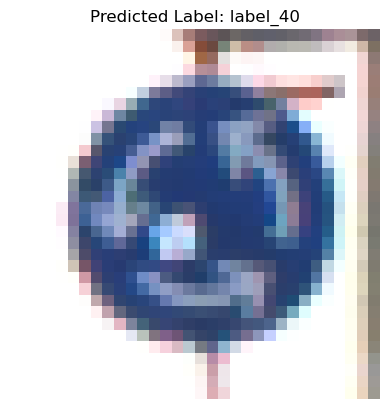

In [144]:
# Path to your external image
external_image_path = r"C:\Users\kumar\Data science\0.PROJECT'S IDEAS\2.DL\Traffic signal Image Classification\Traffic signal data\Test\label_40\test_image_3454.png"
external_image = image.load_img(external_image_path, target_size=image_shape[:2])
external_image = image.img_to_array(external_image)
external_image = np.expand_dims(external_image, axis=0)
external_image = external_image / 255.0

# Predicting using the model
predictions = model.predict(external_image)
predicted_class = np.argmax(predictions)

# Retrieving class labels from train_set class_indices
class_labels = list(train_set.class_indices.keys())
predicted_label = class_labels[predicted_class]

# Display prediction percentages for each class
prediction_percentages = predictions[0] * 100
print("Predicted Label:", predicted_label)
for i, percentage in enumerate(prediction_percentages):
    print(f"{class_labels[i]}: {percentage:.2f}%")

# Displaying the image with the predicted label
plt.imshow(external_image[0])
plt.title(f"Predicted Label: {predicted_label}")
plt.axis('off')
plt.show()

#


# **<mark style="background-color:#9370DB;color:white;border-radius:5px;opacity:1.0">8.Conclusion for the Traffic Sign Classification Project:<a id="conclusion"></a></mark>**

##### <div class="alert alert-block alert-info"><h3>Achievement of Key Objective:</h3><br><br>The project successfully developed a Traffic Sign Classification model using advanced neural network architectures, including InceptionV3 and CNN. This achievement marks a significant milestone in addressing the complex challenge of accurately classifying traffic signs in diverse conditions.
</div>

##### <div class="alert alert-block alert-info"><h3>Technological Advancement:</h3><br><br>The use of sophisticated AI and machine learning techniques represents a notable advancement in the field of autonomous driving and ADAS. By accurately interpreting traffic signs, the model enhances the safety and reliability of these systems.
</div>

##### <div class="alert alert-block alert-info"><h3>Business Impact:</h3><br><br> From a business perspective, this project offers a competitive edge in the rapidly growing market of autonomous vehicle technology. The ability to accurately recognize traffic signs is a key differentiator for automotive companies looking to lead in this space.
.</div>

##### <div class="alert alert-block alert-info"><h3>Contribution to Road Safety:</h3><br><br>By improving the accuracy of traffic sign recognition, the project directly contributes to road safety. This is particularly crucial in urban areas where traffic signs play a vital role in guiding driver behavior and ensuring smooth traffic flow.</div>

##### <div class="alert alert-block alert-info"><h3>Scalability and Application:</h3><br><br>The developed model holds potential for scalability and integration into various applications beyond autonomous vehicles, including traffic monitoring systems and road infrastructure management.</div>

##### <div class="alert alert-block alert-info"><h3>Future Opportunities:</h3><br><br>The project opens up opportunities for future enhancements, such as adapting the model to recognize signs in different countries or under more challenging environmental conditions. There's also potential for integration with other vehicular systems, like collision avoidance and GPS navigation.</div>

##### <div class="alert alert-block alert-info"><h3>Market Readiness:</h3><br><br>Given the increasing demand for advanced safety features in vehicles, the project positions itself favorably in the market. It meets a critical need for sophisticated ADAS capabilities, appealing to safety-conscious consumers and regulatory bodies emphasizing road safety.</div>

##### <div class="alert alert-block alert-info"><h3>In conclusion:</h3><br><br>The Traffic Sign Classification project not only achieved its technical goals but also presents significant business opportunities in the automotive industry and intelligent transportation systems, paving the way for safer and more efficient road travel.</div>

# <p style="padding:10px;background-color:#8A2BE2;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Thank You</p>